In [4]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

#import sklearn.metrics

tech_supp_df = pd.read_csv("technical_support_data.csv")
tech_supp_df.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [6]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [16]:
techSuppAttr = tech_supp_df.iloc[:,1:]
techSuppAttr.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,170,1.3,32,0.04,0.0,75,25
1,12,2.0,150,0.01,0.5,5,95
2,5,1.0,35,0.02,0.2,90,10
3,3,2.0,8,0.01,0.7,5,95
4,45,2.3,54,0.15,0.0,99,1


In [17]:
#after apply zscore apply data
techSuppScaled=techSuppAttr.apply(zscore)
print(techSuppScaled)

    no_of_cases  Avg_pending_calls  Avg_resol_time  recurrence_freq  \
0      0.179429          -0.701207       -0.538351        -0.843188   
1     -0.862176           0.027143        1.510857        -1.101765   
2     -0.908323          -1.013357       -0.486253        -1.015573   
3     -0.921508           0.027143       -0.955140        -1.101765   
4     -0.644625           0.339294       -0.156296         0.104930   
5     -0.631441           1.171694        1.198266         1.397818   
6     -0.862176           2.108144        1.580322        -1.015573   
7      0.146467          -0.805257       -0.538351        -0.929380   
8      1.174886          -1.013357       -1.007238         0.622085   
9     -0.796251           1.379794        1.337195         0.018738   
10    -0.789659           2.420294        1.389294         0.622085   
11     0.574975          -0.701207       -0.694647        -1.015573   
12     0.331055          -0.805257       -0.520985        -0.929380   
13    

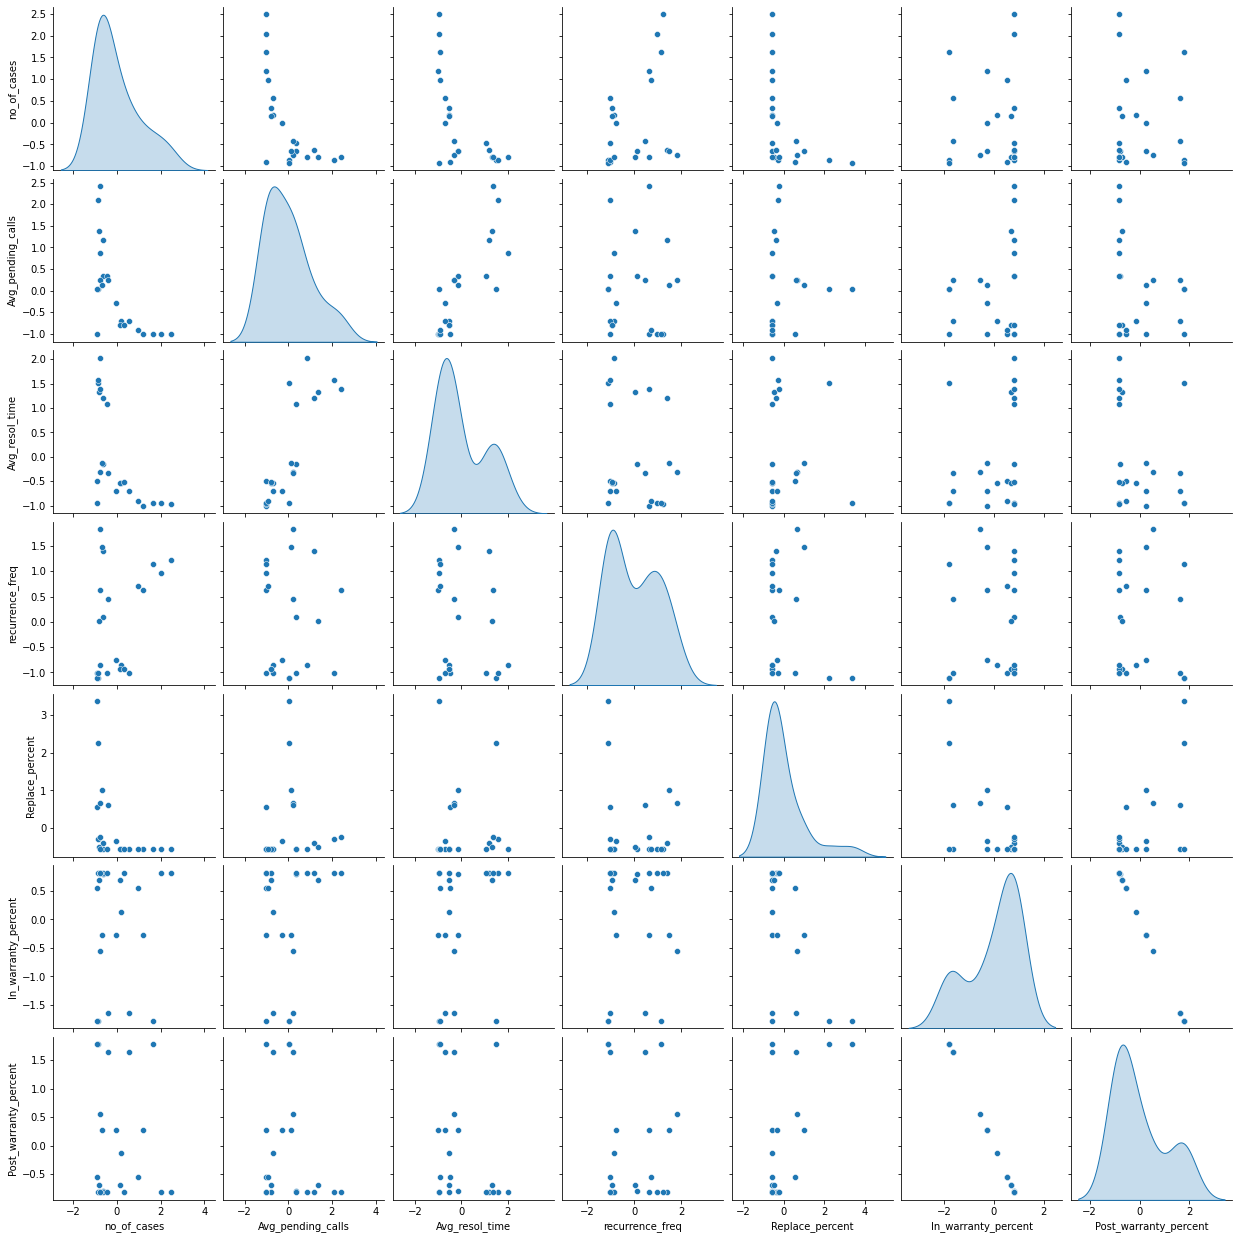

In [18]:
#plat pairploat data
techSuppAttr=tech_supp_df.iloc[:,1:]
techSuppScaled=techSuppAttr.apply(zscore)
sns.pairplot(techSuppScaled,diag_kind='kde')
plt.show()

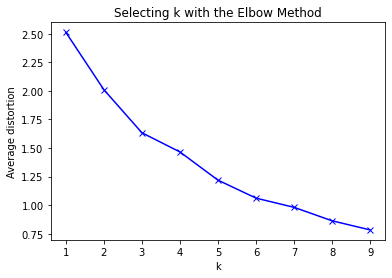

In [21]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(techSuppScaled)
    prediction=model.predict(techSuppScaled)
    meanDistortions.append(sum(np.min(cdist(techSuppScaled, model.cluster_centers_, 'euclidean'), axis=1)) / techSuppScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [22]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,2
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,2
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,1


In [24]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,250.444444,1.166667,20.666667,0.125556,0.026667,85.555556,14.444444
1,35.000000,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
2,112.142857,1.828571,47.857143,0.165714,0.272857,20.714286,79.285714


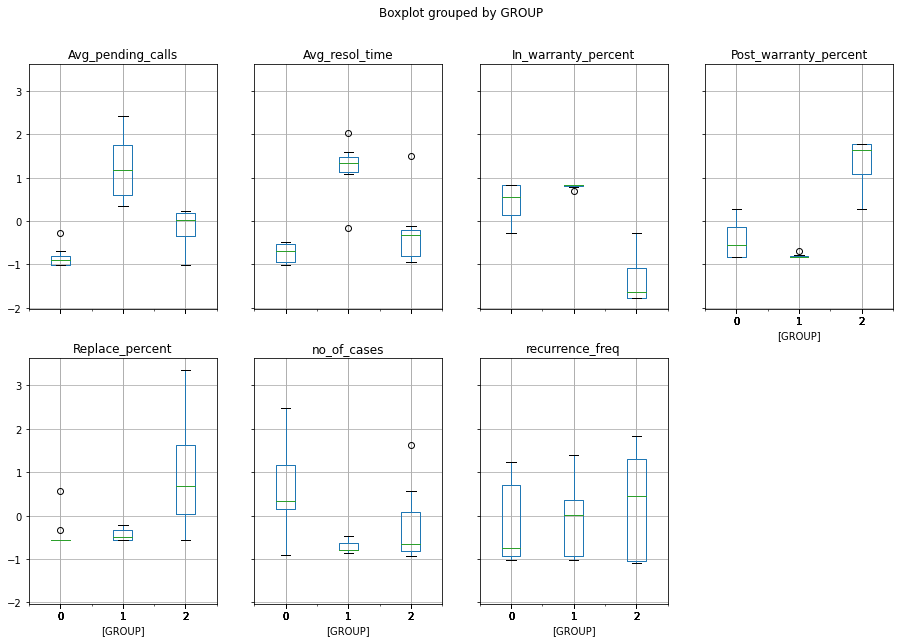

In [25]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
plt.show()

In [26]:
#  Let us next try with K = 5, the next elbow point

In [27]:
# Let us first start with K = 5
final_model=KMeans(5)
final_model.fit(techSuppScaled)
prediction=final_model.predict(techSuppScaled)

#Append the prediction 
tech_supp_df["GROUP"] = prediction
techSuppScaled["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df.head()

Groups Assigned : 



,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,GROUP
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25,0
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95,1
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10,0
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95,1
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1,2


In [28]:
techSuppClust = tech_supp_df.groupby(['GROUP'])
techSuppClust.mean()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
GROUP,,,,,,,
0,134.60,1.280000,31.000000,0.034000,0.048000,84.000000,16.000000
1,7.50,2.000000,79.000000,0.010000,0.600000,5.000000,95.000000
2,35.00,3.157143,132.571429,0.125714,0.021429,99.142857,0.857143
3,154.00,1.760000,35.400000,0.228000,0.142000,27.000000,73.000000
4,395.25,1.025000,7.750000,0.240000,0.000000,87.500000,12.500000


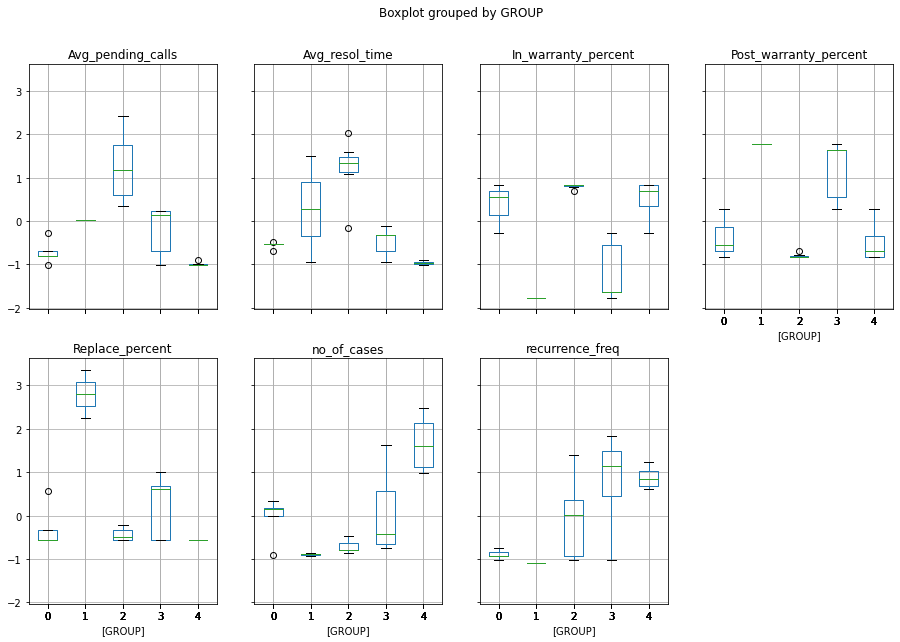

In [29]:
techSuppScaled.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))
plt.show()